In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Replace categorical values with numerical values
df.replace({"Yes": 1, "No": 0}, inplace=True)

df.replace({"18-24": 0, "25-29": 1, "30-34": 2, "35-39": 3, "40-44": 4, "45-49": 5, "50-54": 6, 
             "55-59": 7, "60-64": 8, "65-69": 9, "70-74": 10, "75-79": 11, "80 or older": 13}, inplace=True)

df.replace({"No, borderline diabetes": 2, "Yes (during pregnancy)": 3}, inplace=True)

df.replace({"Excellent": 0, "Good": 1, "Fair": 2, "Very good": 3, "Poor": 4}, inplace=True)

df.replace({"White": 0, "Other": 1, "Black": 2, "Hispanic": 3, "Asian": 4, "American Indian/Alaskan Native": 4}, inplace=True)

df.replace({"Female": 0, "Male": 1}, inplace=True)

In [6]:
# Binning BMI
df['BMI'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, np.inf], labels=[0, 1, 2, 3])

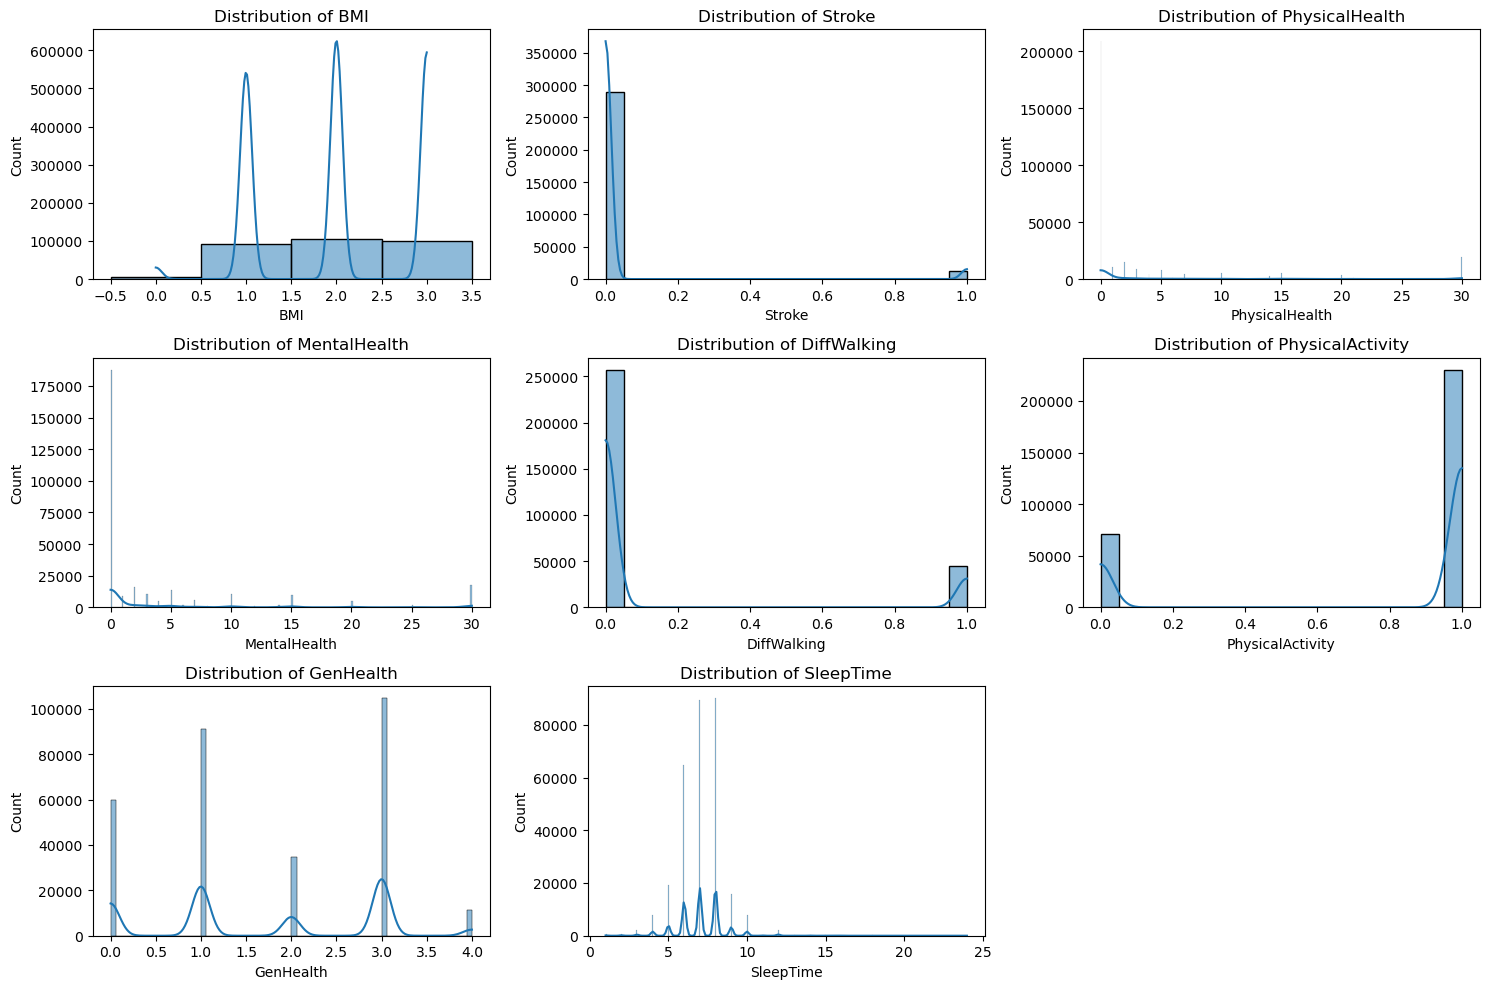

In [7]:
# Visualizing distribution of numerical features
numerical_features = ["BMI", "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking", "PhysicalActivity", "GenHealth", "SleepTime"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

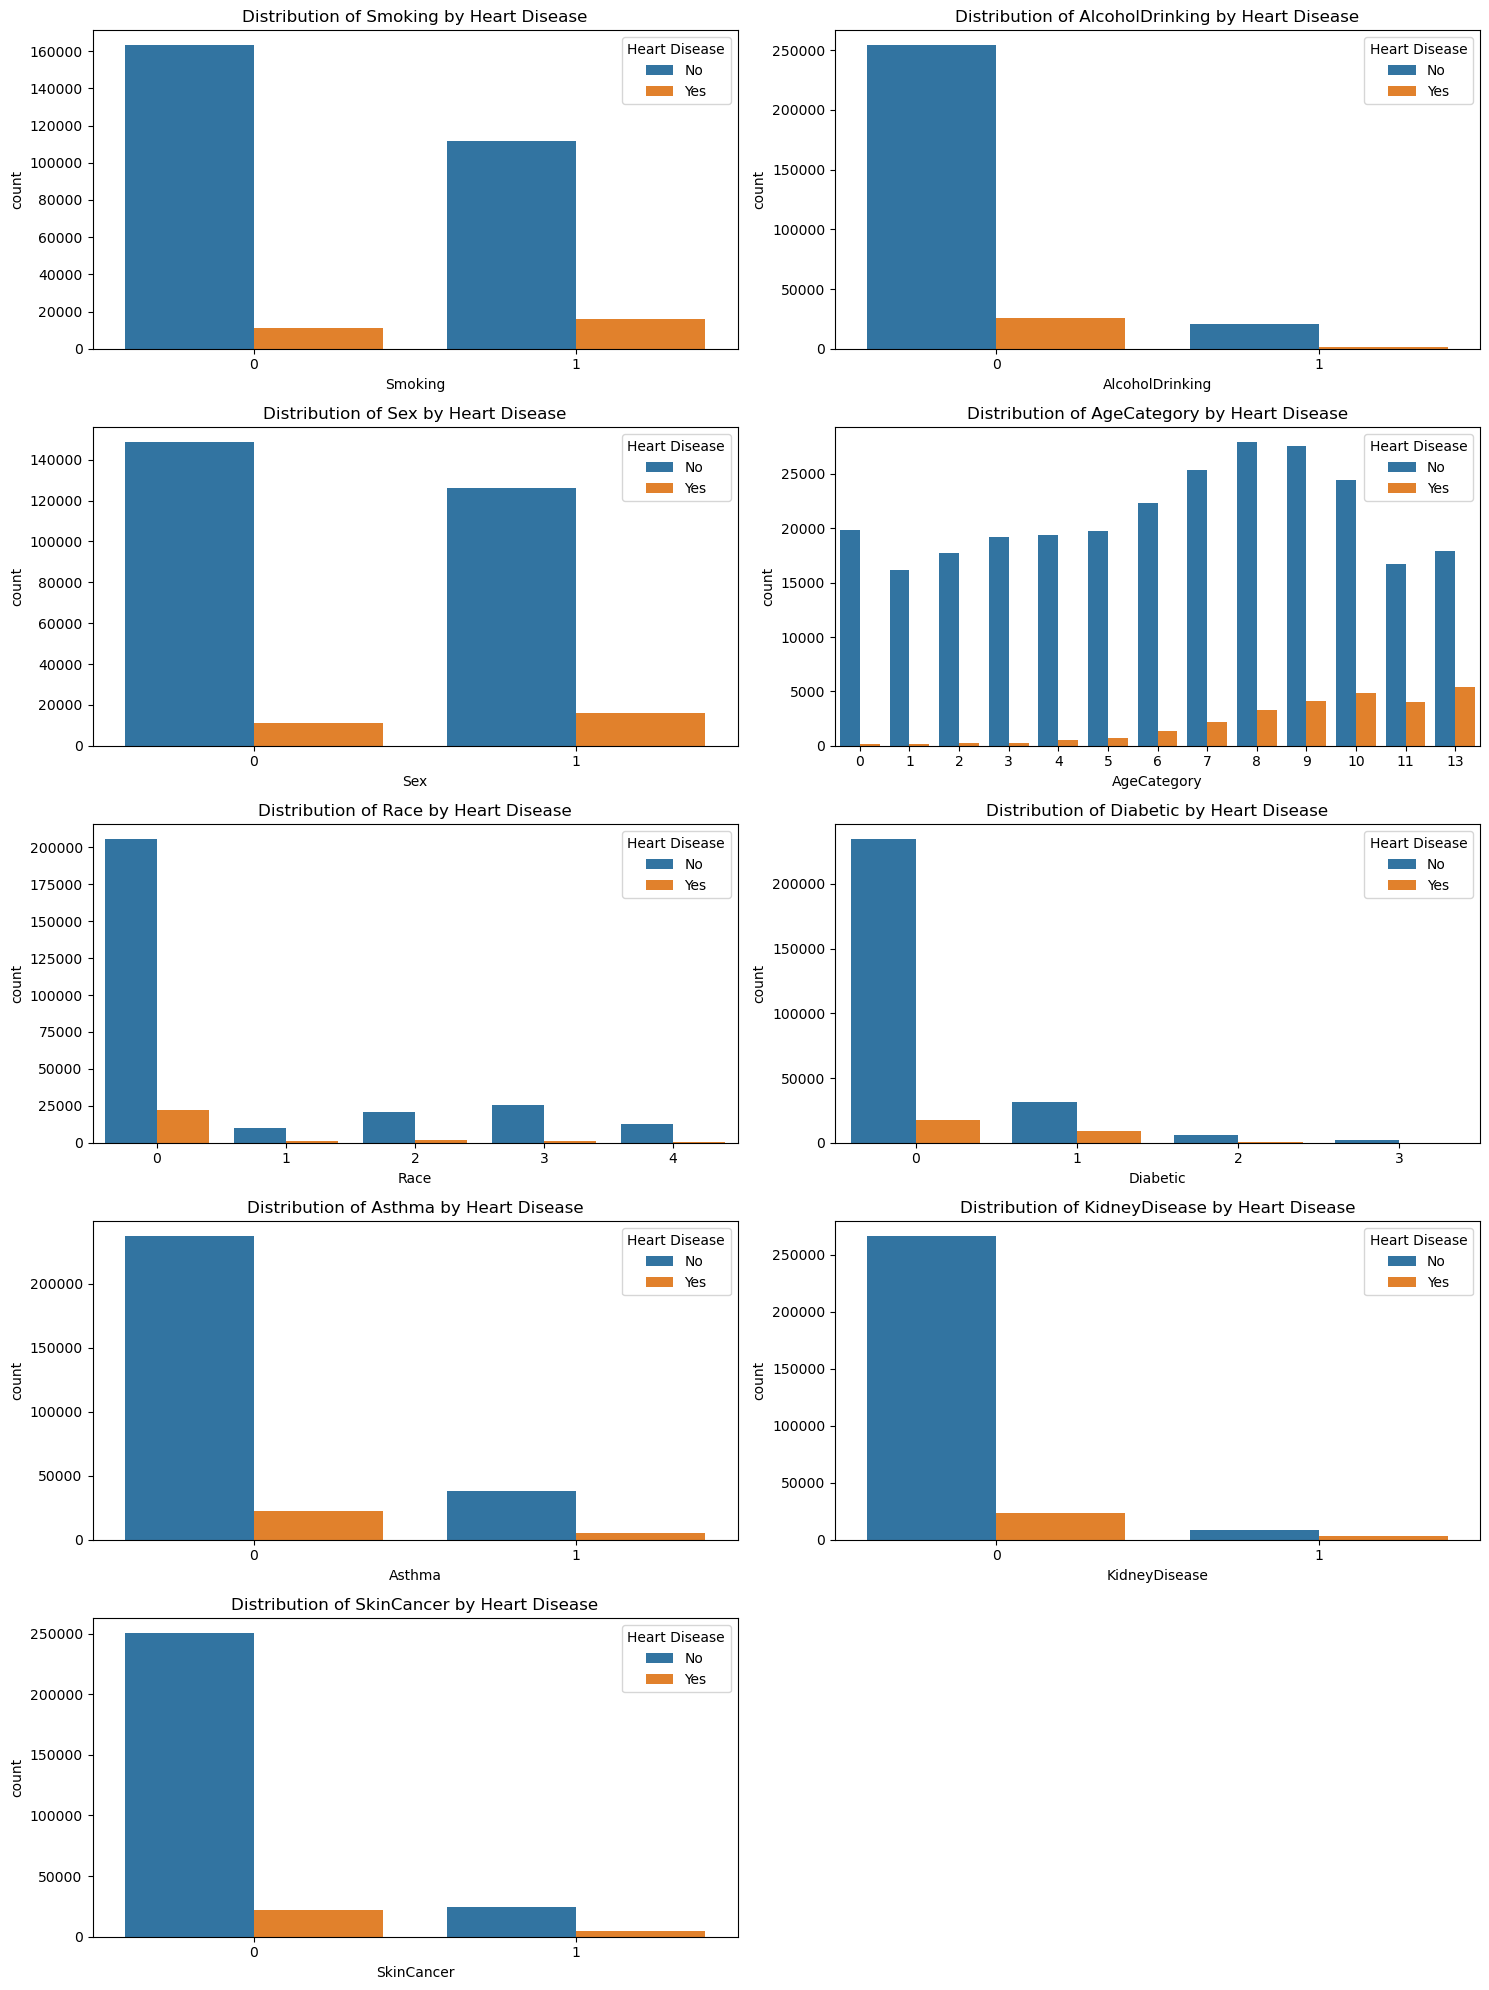

In [8]:
# Visualizing relationship between categorical features and target variable
categorical_features = ["Smoking", "AlcoholDrinking", "Sex", "AgeCategory", "Race", "Diabetic", "Asthma", "KidneyDisease", "SkinCancer"]
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=feature, hue="HeartDisease")
    plt.title(f"Distribution of {feature} by Heart Disease")
    plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

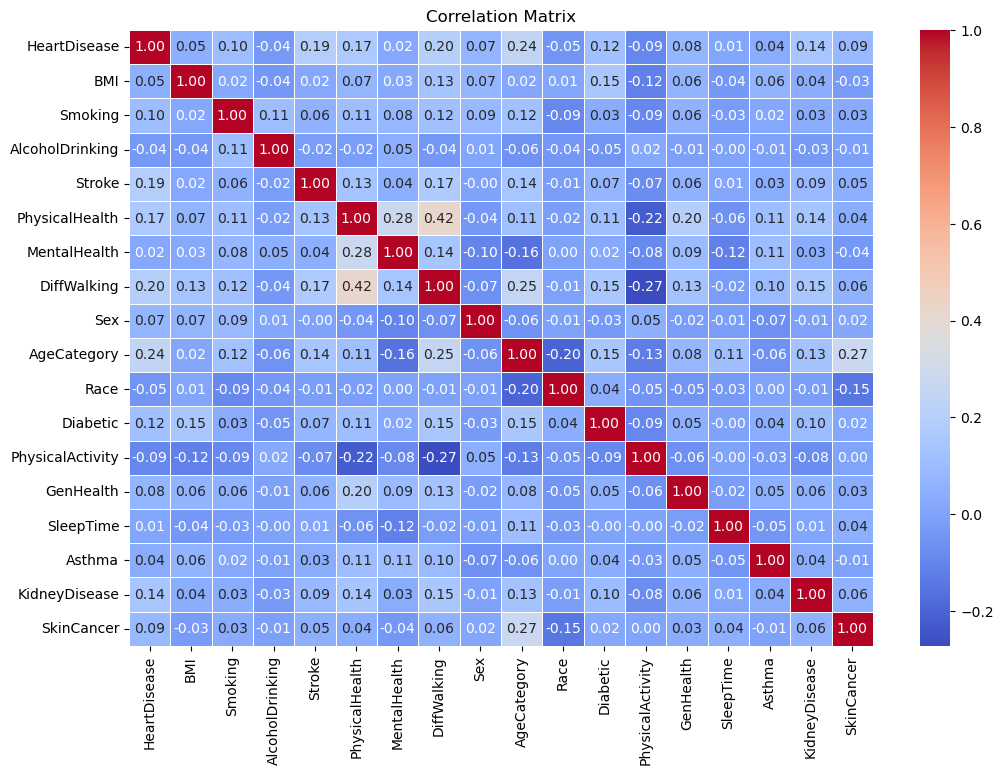

In [9]:
# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Split the data into features and target
X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

In [11]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train different classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "K Nearest Neighbors": KNeighborsClassifier()
}

results = {}


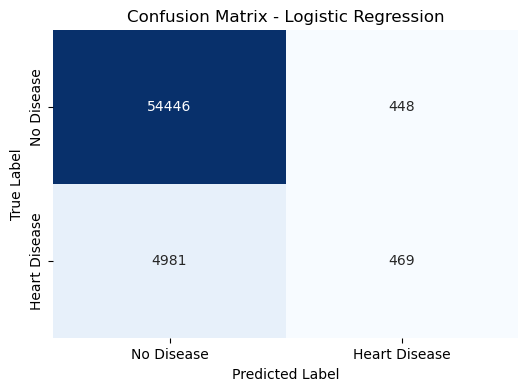

In [13]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
confusion_log_reg = confusion_matrix(y_test, y_pred_log_reg)

results["Logistic Regression"] = {"Accuracy": accuracy_log_reg, 
                                  "Precision": precision_log_reg, 
                                  "Recall": recall_log_reg, 
                                  "F1 Score": f1_log_reg, 
                                  "Confusion Matrix": confusion_log_reg}

# Visualizing confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(results["Logistic Regression"]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [14]:
print(results)

{'Logistic Regression': {'Accuracy': 0.9100324804454462, 'Precision': 0.5114503816793893, 'Recall': 0.08605504587155963, 'F1 Score': 0.14732212973142766, 'Confusion Matrix': array([[54446,   448],
       [ 4981,   469]], dtype=int64)}}


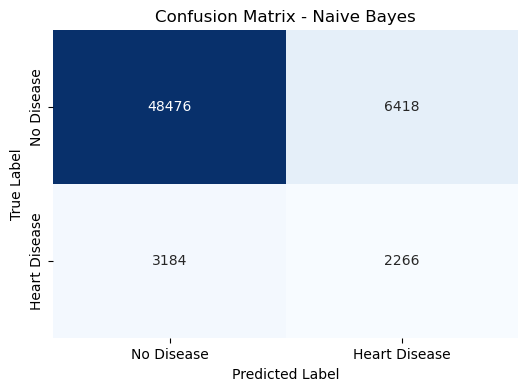

In [15]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)

results["Naive Bayes"] = {"Accuracy": accuracy_nb, 
                          "Precision": precision_nb, 
                          "Recall": recall_nb, 
                          "F1 Score": f1_nb, 
                          "Confusion Matrix": confusion_nb}

# Visualizing confusion matrix for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(results["Naive Bayes"]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
print(results)

{'Logistic Regression': {'Accuracy': 0.9100324804454462, 'Precision': 0.5114503816793893, 'Recall': 0.08605504587155963, 'F1 Score': 0.14732212973142766, 'Confusion Matrix': array([[54446,   448],
       [ 4981,   469]], dtype=int64)}, 'Naive Bayes': {'Accuracy': 0.8408789606257457, 'Precision': 0.26093965914325196, 'Recall': 0.41577981651376145, 'F1 Score': 0.3206452525824253, 'Confusion Matrix': array([[48476,  6418],
       [ 3184,  2266]], dtype=int64)}}


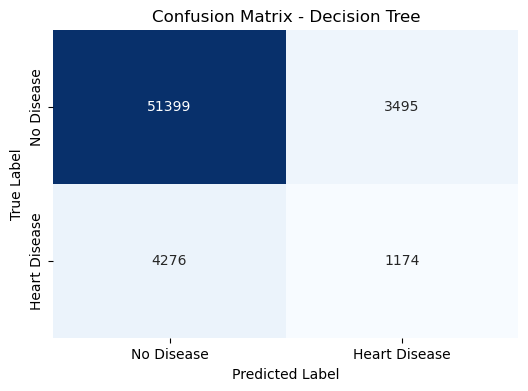

In [17]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

results["Decision Tree"] = {"Accuracy": accuracy_dt, 
                            "Precision": precision_dt, 
                            "Recall": recall_dt, 
                            "F1 Score": f1_dt, 
                            "Confusion Matrix": confusion_dt}

# Visualizing confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(results["Decision Tree"]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
print(results)

{'Logistic Regression': {'Accuracy': 0.9100324804454462, 'Precision': 0.5114503816793893, 'Recall': 0.08605504587155963, 'F1 Score': 0.14732212973142766, 'Confusion Matrix': array([[54446,   448],
       [ 4981,   469]], dtype=int64)}, 'Naive Bayes': {'Accuracy': 0.8408789606257457, 'Precision': 0.26093965914325196, 'Recall': 0.41577981651376145, 'F1 Score': 0.3206452525824253, 'Confusion Matrix': array([[48476,  6418],
       [ 3184,  2266]], dtype=int64)}, 'Decision Tree': {'Accuracy': 0.8712216624685138, 'Precision': 0.2514457057185693, 'Recall': 0.21541284403669725, 'F1 Score': 0.2320387390058306, 'Confusion Matrix': array([[51399,  3495],
       [ 4276,  1174]], dtype=int64)}}


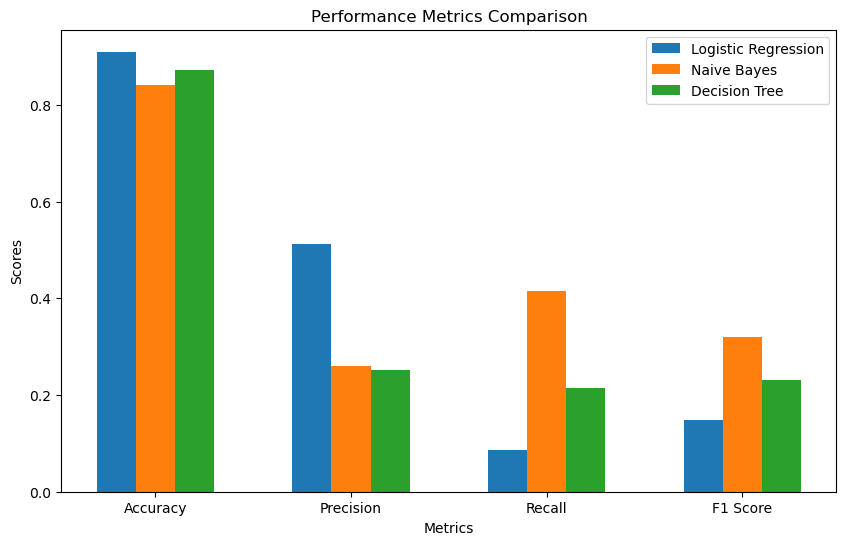

In [19]:
# Extracting performance metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
log_reg_metrics = [results["Logistic Regression"][metric] for metric in metrics]
nb_metrics = [results["Naive Bayes"][metric] for metric in metrics]
dt_metrics = [results["Decision Tree"][metric] for metric in metrics]

# Creating bar plots for performance metrics
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(metrics))

plt.bar(index, log_reg_metrics, bar_width, label="Logistic Regression")
plt.bar(index + bar_width, nb_metrics, bar_width, label="Naive Bayes")
plt.bar(index + 2*bar_width, dt_metrics, bar_width, label="Decision Tree")

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()

In [1]:
import numpy as np

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [21]:
# Calculate predicted probabilities for the positive class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Assuming log_reg is your trained Logistic Regression model

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


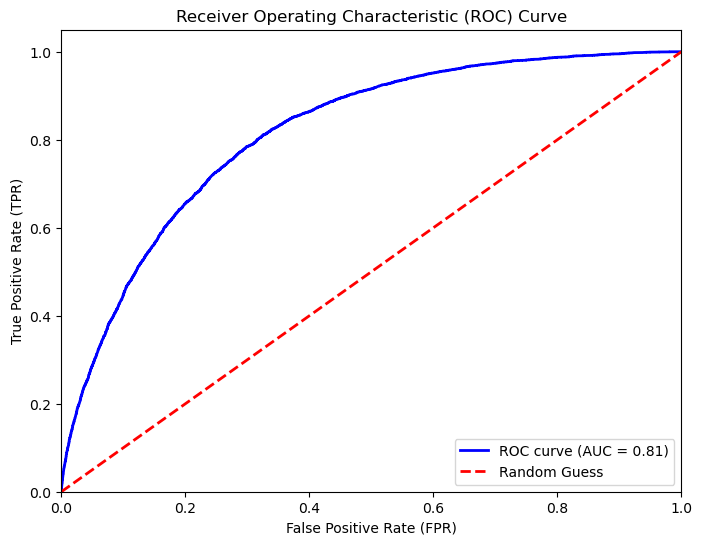

In [22]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()